In [26]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import librosa
import os
import math
import shutil
import pandas as pd

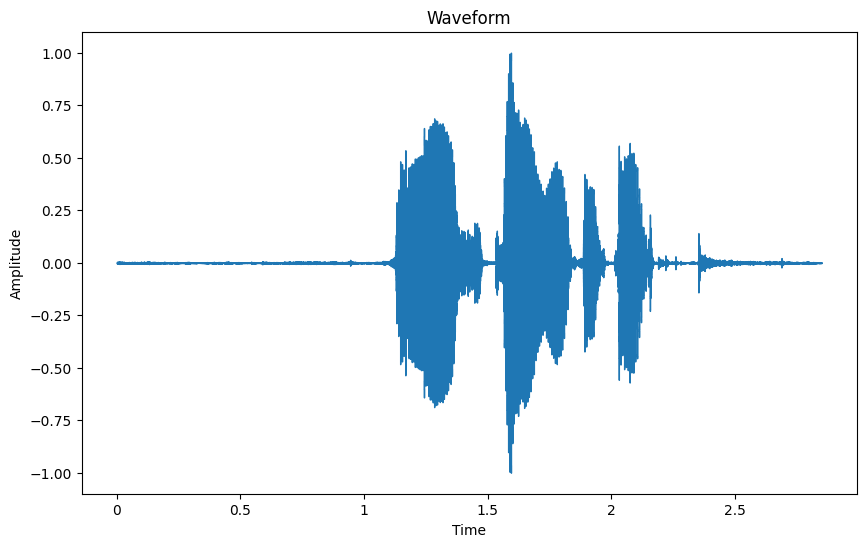

In [27]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load audio file
audio_file_path = "/kaggle/input/audio-for-lstm/audio/0/LA_T_1000406.flac"
signal, sample_rate = librosa.load(audio_file_path, sr=None)

# Plot waveform
plt.figure(figsize=(10, 6))
librosa.display.waveshow(signal, sr=sample_rate)
plt.title('Waveform')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()



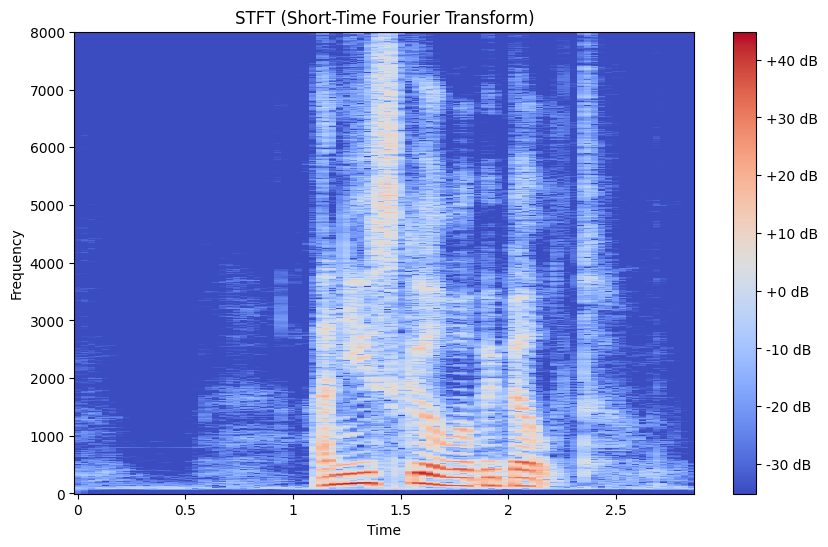

In [28]:
# Compute STFT (Short-Time Fourier Transform)
stft = librosa.stft(signal)
stft_db = librosa.amplitude_to_db(np.abs(stft))

# Plot STFT
plt.figure(figsize=(10, 6))
librosa.display.specshow(stft_db, sr=sample_rate, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT (Short-Time Fourier Transform)')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()


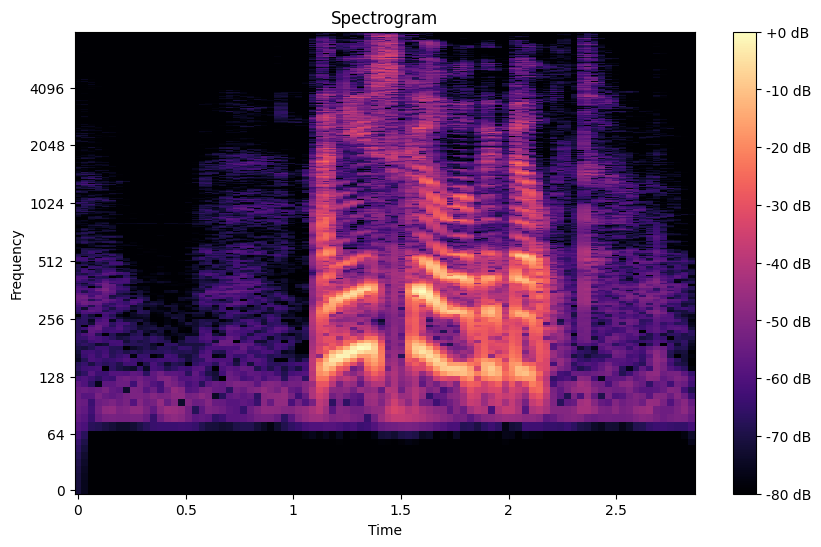

In [29]:
# Compute spectral centroid
spectral_centroids = librosa.feature.spectral_centroid(y=signal, sr=sample_rate)[0]


# Compute and plot spectrogram
plt.figure(figsize=(10, 6))
spectrogram = np.abs(librosa.stft(signal))**2
librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()


In [30]:
BASE_PATH = '/kaggle/input/asvpoof-2019-dataset/LA/LA'

In [31]:
train_df = pd.read_csv(f'{BASE_PATH}/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt',
                       sep=" ", header=None)

In [32]:
train_df.head(5)

,0,1,2,3,4
0,LA_0079,LA_T_1138215,-,-,bonafide
1,LA_0079,LA_T_1271820,-,-,bonafide
2,LA_0079,LA_T_1272637,-,-,bonafide
3,LA_0079,LA_T_1276960,-,-,bonafide
4,LA_0079,LA_T_1341447,-,-,bonafide


In [33]:
train_df.columns =['speaker_id','filename','system_id','null','class_name']
train_df.drop(columns=['null'],inplace=True)
train_df.head(5)

,speaker_id,filename,system_id,class_name
0,LA_0079,LA_T_1138215,-,bonafide
1,LA_0079,LA_T_1271820,-,bonafide
2,LA_0079,LA_T_1272637,-,bonafide
3,LA_0079,LA_T_1276960,-,bonafide
4,LA_0079,LA_T_1341447,-,bonafide


In [34]:
train_df['filepath'] = f'{BASE_PATH}/ASVspoof2019_LA_train/flac/'+train_df.filename+'.flac'
train_df['target'] = (train_df.class_name=='spoof').astype('int32')
print('len Train', len(train_df))
train_df.head(5)

len Train 25380


,speaker_id,filename,system_id,class_name,filepath,target
0,LA_0079,LA_T_1138215,-,bonafide,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,0
1,LA_0079,LA_T_1271820,-,bonafide,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,0
2,LA_0079,LA_T_1272637,-,bonafide,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,0
3,LA_0079,LA_T_1276960,-,bonafide,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,0
4,LA_0079,LA_T_1341447,-,bonafide,/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVsp...,0


In [35]:
import os
import shutil

# Check and create previously created folders if necessary
output_folder_0 = './0'  # Folder name 0
output_folder_1 = './1'  # Folder name 1

if not os.path.exists(output_folder_0):
    os.makedirs(output_folder_0)

if not os.path.exists(output_folder_1):
    os.makedirs(output_folder_1)

# Iterate over the train dataframe and copy files to the respective folders
for index, row in train_df.iterrows():
    source_filepath = row['filepath']
    target_folder = f'./{row["target"]}'
    target_filepath = os.path.join(target_folder, os.path.basename(source_filepath))

    # Check the target folder and create if necessary
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    # Copy the file to the target folder
    shutil.copy(source_filepath, target_filepath)

# You can use the following lines to check the created folders after the process is completed
print(f'There are {len(os.listdir(output_folder_0))} files in folder 0.')
print(f'There are {len(os.listdir(output_folder_1))} files in folder 1.')


There are 2580 files in folder 0.
There are 22800 files in folder 1.


In [36]:
folder_path = './0'

files = os.listdir(folder_path)

total_files = len(files)

print(f"There are a total of {total_files} files in the folder.")


There are a total of 2580 files in the folder.


In [37]:
import os

folder_path = './1'  # The folder path you need to change

files = os.listdir(folder_path)

total_files = len(files)

print(f"There are a total of {total_files} files in the folder.")


There are a total of 22800 files in the folder.


In [38]:
import random
import os

folder_path = './0'  # The folder path you need to change

files = os.listdir(folder_path)

total_files = len(files)

# Number of files to delete
num_files_to_delete = 1580

files_to_delete = random.sample(files, min(num_files_to_delete, total_files))

for file_name in files_to_delete:
    file_path = os.path.join(folder_path, file_name)
    try:
        os.remove(file_path)
#         print(f"The file {file_name} has been deleted.")
    except Exception as e:
        print(f"Error occurred while deleting: {e}")

remaining_files = os.listdir(folder_path)
# print(f"There are {len(remaining_files)} files remaining in the folder.")


In [39]:
import random
import os

folder_path = './1'

files = os.listdir(folder_path)

total_files = len(files)

# Number of files to delete
num_files_to_delete = 21800

files_to_delete = random.sample(files, min(num_files_to_delete, total_files))

for file_name in files_to_delete:
    file_path = os.path.join(folder_path, file_name)
    os.remove(file_path)


In [40]:
import os
import shutil

source_folders = ['0', '1']

# Name of the target folder
target_folder = 'audio'

if not os.path.exists(target_folder):
    os.makedirs(target_folder)

for source_folder in source_folders:
    source_folder_path = os.path.join('.', source_folder)
    target_folder_path = os.path.join(target_folder, source_folder)

    # Check if the source folder exists
    if os.path.exists(source_folder_path):
        # Create the target folder if it doesn't exist
        if not os.path.exists(target_folder_path):
            os.makedirs(target_folder_path)

        # Move files from the source folder to the target folder
        for file_name in os.listdir(source_folder_path):
            source_file_path = os.path.join(source_folder_path, file_name)
            target_file_path = os.path.join(target_folder_path, file_name)
            shutil.move(source_file_path, target_file_path)

# print(f"Process completed. Files in '{target_folder}' folder:")
# print(os.listdir(target_folder))


In [41]:
DATASET_PATH = "/kaggle/working/audio"
JSON_PATH = "data.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [42]:

def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):

    
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        
        if dirpath is not dataset_path:

            
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            
            for f in filenames:

                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                
                for d in range(num_segments):

                    
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # Extract MFCCs
                    mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)

    # Save MFCCs as JSON
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)


In [43]:
if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=233
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=829
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=2022
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1230
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=567
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: 

In [44]:
from tensorflow.keras.models import load_model
import tensorflow as tf

**LSTM**

In [45]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras

DATA_PATH = "/kaggle/input/audio-for-lstm/data.json"

def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y

def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.

    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)
    print(len(X))
    print(len(X_train))
    print(len(X_test))
    print(len(X_validation))
    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    """Generates RNN-LSTM model

    :param input_shape (tuple): Shape of input set
    :return model: RNN-LSTM model
    """

    # build network topology
    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))

    # dense layer
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(2, activation='softmax'))

    return model


In [46]:
if __name__ == "__main__":

    # Get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # Create network
    input_shape = (X_train.shape[1], X_train.shape[2]) # 130, 13
    model = build_model(input_shape)

    # Compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    early_stopping = keras.callbacks.EarlyStopping(
            monitor='val_loss', 
            verbose=1,
            patience=5,
            mode='min',
            restore_best_weights=True,
        )
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # Train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=50,callbacks=[early_stopping],
)

    # Evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)


1248
748
312
188
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 130, 64)           19968     
                                                                 
 lstm_4 (LSTM)               (None, 64)                33024     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 57282 (223.76 KB)
Trainable params: 57282 (223.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

10/10 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       158
           1       0.85      0.86      0.86       154

    accuracy                           0.86       312
   macro avg       0.86      0.86      0.86       312
weighted avg       0.86      0.86      0.86       312

24/24 [==============================] - 0s 6ms/step - loss: 0.2724 - accuracy: 0.9064


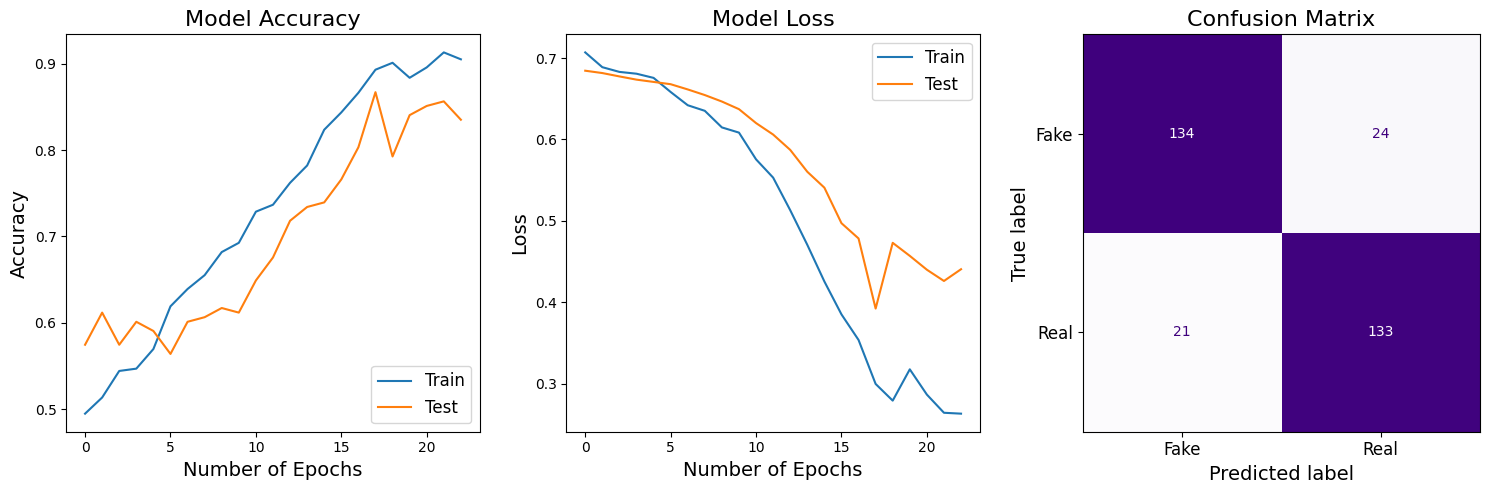

In [47]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from sklearn.metrics import classification_report

# Create subplots for accuracy, loss, and confusion matrix
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  

# Plot accuracy
axs[0].plot(history.history["accuracy"], label="Train")
axs[0].plot(history.history["val_accuracy"], label="Test")
axs[0].set_ylabel("Accuracy",fontsize=14)
axs[0].set_xlabel("Number of Epochs",fontsize=14)
axs[0].legend(loc="lower right",fontsize=12)
axs[0].set_title("Model Accuracy", fontsize=16)

# Plot loss
axs[1].plot(history.history["loss"], label="Train")
axs[1].plot(history.history["val_loss"], label="Test")
axs[1].set_ylabel("Loss", fontsize=14)
axs[1].set_xlabel("Number of Epochs",fontsize=14)
axs[1].legend(loc="upper right", fontsize=12)
axs[1].set_title("Model Loss", fontsize=16)

# Plot confusion matrix
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)  # Print classification report
loss = model.evaluate(X_train, y_train)
cf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=['Fake', 'Real'])
disp.plot(ax=axs[2], cmap='Purples')
disp.ax_.set_title('Confusion Matrix', fontsize=16, fontweight='medium')
disp.im_.colorbar.remove()
disp.ax_.set_xlabel('Predicted label', fontsize=14)
disp.ax_.set_ylabel('True label', fontsize=14)
disp.ax_.set_xticklabels(['Fake', 'Real'], fontsize=12)
disp.ax_.set_yticklabels(['Fake', 'Real'], fontsize=12)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


**Hybrid Model**

In [48]:
from keras.layers import Reshape


In [49]:
import os
import numpy as np
import json
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Flatten, Dropout, TimeDistributed


# Set the directory path where your JSON file is located
DATA_DIRECTORY = "/kaggle/input/audio-for-lstm"

# Define the filename of your JSON file
DATA_FILENAME = "data.json"

# Construct the full path to your JSON file
DATA_PATH = os.path.join(DATA_DIRECTORY, DATA_FILENAME)


# Load data
def load_data(data_path):
    with open(data_path, "r") as fp:
        data = json.load(fp)
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y

# Prepare datasets
def prepare_datasets(test_size, validation_size):
    X, y = load_data(DATA_PATH)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)
    return X_train, X_validation, X_test, y_train, y_validation, y_test

def build_hybrid_model(input_shape, num_classes):
    model = Sequential()

    # CNN layers
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())

    # Reshape data for LSTM
    num_timesteps = input_shape[0] // 8  # Assuming 8 features per timestep
    model.add(Reshape((num_timesteps, -1)))  # Reshape to (num_timesteps, num_features_per_timestep)

    # LSTM layer
    model.add(Dropout(0.3))
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.3))

    # Flatten LSTM output
    model.add(Flatten())

    # Dense layers
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    return model


if __name__ == "__main__":
    # Parameters
    TEST_SIZE = 0.2
    VALIDATION_SIZE = 0.1
    NUM_CLASSES = 10  # Number of classes in your dataset
    INPUT_SHAPE = (X_train.shape[1], X_train.shape[2], 1)  # Adjust input shape based on your data

    # Load and prepare datasets
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(TEST_SIZE, VALIDATION_SIZE)

    # Build hybrid model
    model = build_hybrid_model(INPUT_SHAPE, NUM_CLASSES)

    # Compile model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train model
    model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=50)

    # Evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print('\nTest accuracy:', test_acc)


Epoch 1/50
29/29 [==============================] - 4s 26ms/step - loss: 0.9488 - accuracy: 0.5067 - val_loss: 0.6650 - val_accuracy: 0.6200
Epoch 2/50
29/29 [==============================] - 0s 7ms/step - loss: 0.6853 - accuracy: 0.6080 - val_loss: 0.5743 - val_accuracy: 0.7300
Epoch 3/50
29/29 [==============================] - 0s 7ms/step - loss: 0.6172 - accuracy: 0.6537 - val_loss: 0.4895 - val_accuracy: 0.7700
Epoch 4/50
29/29 [==============================] - 0s 7ms/step - loss: 0.5591 - accuracy: 0.7205 - val_loss: 0.4736 - val_accuracy: 0.8400
Epoch 5/50
29/29 [==============================] - 0s 7ms/step - loss: 0.4923 - accuracy: 0.7918 - val_loss: 0.4827 - val_accuracy: 0.7700
Epoch 6/50
29/29 [==============================] - 0s 7ms/step - loss: 0.4494 - accuracy: 0.7973 - val_loss: 0.5035 - val_accuracy: 0.7700
Epoch 7/50
29/29 [==============================] - 0s 7ms/step - loss: 0.4329 - accuracy: 0.8174 - val_loss: 0.4603 - val_accuracy: 0.8200
Epoch 8/50
29/29 [=

8/8 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       119
           1       0.85      0.92      0.89       131

    accuracy                           0.88       250
   macro avg       0.88      0.87      0.87       250
weighted avg       0.88      0.88      0.88       250

29/29 [==============================] - 0s 3ms/step - loss: 0.2172 - accuracy: 0.9198


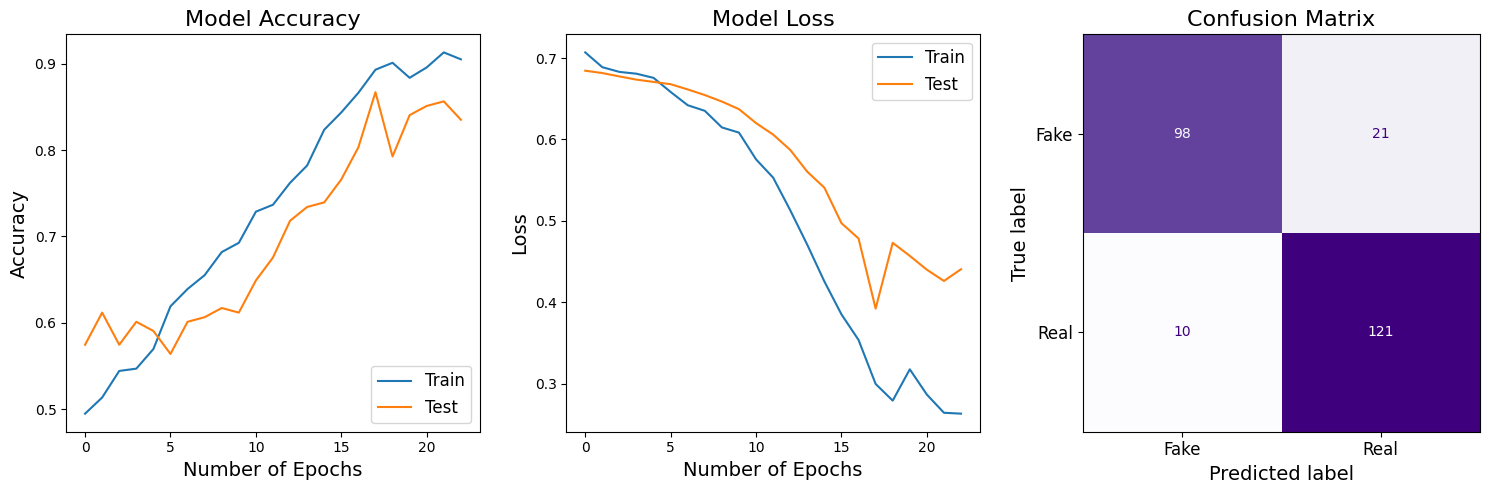

In [50]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from sklearn.metrics import classification_report

# Create subplots for accuracy, loss, and confusion matrix
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  

# Plot accuracy
axs[0].plot(history.history["accuracy"], label="Train")
axs[0].plot(history.history["val_accuracy"], label="Test")
axs[0].set_ylabel("Accuracy",fontsize=14)
axs[0].set_xlabel("Number of Epochs",fontsize=14)
axs[0].legend(loc="lower right",fontsize=12)
axs[0].set_title("Model Accuracy", fontsize=16)

# Plot loss
axs[1].plot(history.history["loss"], label="Train")
axs[1].plot(history.history["val_loss"], label="Test")
axs[1].set_ylabel("Loss", fontsize=14)
axs[1].set_xlabel("Number of Epochs",fontsize=14)
axs[1].legend(loc="upper right", fontsize=12)
axs[1].set_title("Model Loss", fontsize=16)

# Plot confusion matrix
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)  # Print classification report
loss = model.evaluate(X_train, y_train)
cf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=['Fake', 'Real'])
disp.plot(ax=axs[2], cmap='Purples')
disp.ax_.set_title('Confusion Matrix', fontsize=16, fontweight='medium')
disp.im_.colorbar.remove()
disp.ax_.set_xlabel('Predicted label', fontsize=14)
disp.ax_.set_ylabel('True label', fontsize=14)
disp.ax_.set_xticklabels(['Fake', 'Real'], fontsize=12)
disp.ax_.set_yticklabels(['Fake', 'Real'], fontsize=12)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [54]:
model.save("/kaggle/working/hybrid_model.h5")


In [57]:
import librosa
import numpy as np
from keras.models import load_model

def predict_voice(model, audio_file_path, genre_mapping):

    # Load the audio file
    signal, sample_rate = librosa.load(audio_file_path, sr=22050)

    # Extract MFCC features from the audio
    mfcc = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=13, n_fft=2048, hop_length=512)
    mfcc = mfcc.T

    # Resize MFCC to fit the model's input shape
    mfcc = np.resize(mfcc, (130, 13, 1))

    # Reshape MFCC to fit the model's input shape
    mfcc = mfcc[np.newaxis, ...]

    # Predict the voice using the hybrid model
    prediction = model.predict(mfcc)
    predicted_index = np.argmax(prediction, axis=1)

    # Get the voice label from the mapping
    voice_label = genre_mapping[predicted_index[0]]
    print("Raw prediction:", prediction)

    return voice_label

# Example usage:

# Load your hybrid model
model_path = "/kaggle/working/hybrid_model.h5"  # Adjust the path to your hybrid model
model = load_model(model_path)

# Path to the audio file
audio_file_path = "/kaggle/input/asvpoof-2019-dataset/PA/PA/ASVspoof2019_PA_train/flac/PA_T_0000001.flac"  # Adjust the path to your audio file

# Mapping of voice labels
genre_mapping = {0: "spoof", 1: "bonafide"}

# Predict the voice from the audio file using the hybrid model
predicted_voice = predict_voice(model, audio_file_path, genre_mapping)

print("Predicted label:", predicted_voice)


1/1 [==============================] - 1s 502ms/step
Raw prediction: [[6.8985014e-03 9.9309349e-01 3.1770107e-06 7.5060221e-08 1.4066635e-06
  9.8382611e-07 2.7100432e-07 2.8039787e-07 1.8256517e-06 9.4756608e-08]]
Predicted label: bonafide
